In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## README

Parse data from https://firstratedata.com/free-intraday-data

Offer 1 year of free intraday data in 2019

All data are in 1-minute bars (open/high/low/close)

All data is in US Eastern Timezone (ie EST/EDT depending on the time of year).

In [2]:
tickers = ["AAPL", "AMZN", "FB", "MSFT", "TSLA"]

df_list = []
for ticker in tickers:
    df = pd.read_csv(f"./{ticker}_FirstRateDatacom1.txt", 
                     names=["datetime", "open", "high", "low", "close", "volume"],
                     parse_dates=["datetime"])
    df["ticker"] = ticker
    df_list.append(df)
    
stock_df = pd.concat(df_list)

# create date and time columns
stock_df["date"] = stock_df["datetime"].dt.normalize()
stock_df["time"] = stock_df["datetime"].dt.time

In [3]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702368 entries, 0 to 140400
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype                     
---  ------               --------------   -----                     
 0   datetime             702368 non-null  datetime64[ns]            
 1   open                 702368 non-null  float64                   
 2   high                 702368 non-null  float64                   
 3   low                  702368 non-null  float64                   
 4   close                702368 non-null  float64                   
 5   volume               702368 non-null  int64                     
 6   ticker               702368 non-null  object                    
 7   datetime_us_eastern  702368 non-null  datetime64[ns, US/Eastern]
 8   datetime_utc         702368 non-null  datetime64[ns, UTC]       
 9   dst                  702368 non-null  timedelta64[ns]           
 10  date                 702368 non-null  dateti

In [5]:
# stock_df.to_csv("./stock_price_2019.csv", index=False)

In [105]:
stock_df.loc[stock_df["dst"] == pd.Timedelta('0 days 01:00:00'), "date"].unique()

array(['2019-03-11T00:00:00.000000000', '2019-03-12T00:00:00.000000000',
       '2019-03-13T00:00:00.000000000', '2019-03-14T00:00:00.000000000',
       '2019-03-15T00:00:00.000000000', '2019-03-18T00:00:00.000000000',
       '2019-03-19T00:00:00.000000000', '2019-03-20T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-22T00:00:00.000000000',
       '2019-03-25T00:00:00.000000000', '2019-03-26T00:00:00.000000000',
       '2019-03-27T00:00:00.000000000', '2019-03-28T00:00:00.000000000',
       '2019-03-29T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-04-02T00:00:00.000000000', '2019-04-03T00:00:00.000000000',
       '2019-04-04T00:00:00.000000000', '2019-04-05T00:00:00.000000000',
       '2019-04-08T00:00:00.000000000', '2019-04-09T00:00:00.000000000',
       '2019-04-10T00:00:00.000000000', '2019-04-11T00:00:00.000000000',
       '2019-04-12T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-04-16T00:00:00.000000000', '2019-04-17

In [109]:
stock_df.set_index(["ticker", "date", "time", "datetime"]).loc["AAPL"].loc["2019-03-08":"2019-03-11"]

open    high       low   close  \
date       time     datetime                                                
2019-03-08 04:00:00 2019-03-08 04:00:00  171.89  171.89  171.8900  171.89   
           04:11:00 2019-03-08 04:11:00  171.70  171.70  171.7000  171.70   
           04:41:00 2019-03-08 04:41:00  171.60  171.61  171.6000  171.60   
           04:43:00 2019-03-08 04:43:00  171.55  171.55  171.5000  171.50   
           04:48:00 2019-03-08 04:48:00  171.41  171.41  171.4100  171.41   
...                                         ...     ...       ...     ...   
2019-03-11 19:55:00 2019-03-11 19:55:00  179.75  179.75  179.7500  179.75   
           19:56:00 2019-03-11 19:56:00  179.75  179.75  179.7300  179.73   
           19:57:00 2019-03-11 19:57:00  179.73  179.73  179.7300  179.73   
           19:58:00 2019-03-11 19:58:00  179.74  179.74  179.7100  179.71   
           19:59:00 2019-03-11 19:59:00  179.80  179.84  179.7799  179.84   

                                         volume       datetime_us_eastern  \
date       time     datetime                                                
2019-03-08 04:00:00 2019-03-08 04:00:00    1676 2019-03-08 04:00:00-05:00   
           04:11:00 2019-03-08 04:11:00     800 2019-03-08 04:11:00-05:00   
           04:41:00 2019-03-08 04:41:00     838 2019-03-08 04:41:00-05:00   
           04:43:00 2019-03-08 04:43:00    1177 2019-03-08 04:43:00-05:00   
           04:48:00 2019-03-08 04:48:00     272 2019-03-08 04:48:00-05:00   
...                                         ...                       ...   
2019-03-11 19:55:00 2019-03-11 19:55:00     300 2019-03-11 19:55:00-04:00   
           19:56:00 2019-03-11 19:56:00    1166 2019-03-11 19:56:00-04:00   
           19:57:00 2019-03-11 19:57:00     800 2019-03-11 19:57:00-04:00   
           19:58:00 2019-03-11 19:58:00     525 2019-03-11 19:58:00-04:00   
           19:59:00 2019-03-11 19:59:00    1241 2019-03-11 19:59:00-04:00   

                                                     datetime_utc  \
date       time     datetime                                        
2019-03-08 04:00:00 2019-03-08 04:00:00 2019-03-08 09:00:00+00:00   
           04:11:00 2019-03-08 04:11:00 2019-03-08 09:11:00+00:00   
           04:41:00 2019-03-08 04:41:00 2019-03-08 09:41:00+00:00   
           04:43:00 2019-03-08 04:43:00 2019-03-08 09:43:00+00:00   
           04:48:00 2019-03-08 04:48:00 2019-03-08 09:48:00+00:00   
...                                                           ...   
2019-03-11 19:55:00 2019-03-11 19:55:00 2019-03-11 23:55:00+00:00   
           19:56:00 2019-03-11 19:56:00 2019-03-11 23:56:00+00:00   
           19:57:00 2019-03-11 19:57:00 2019-03-11 23:57:00+00:00   
           19:58:00 2019-03-11 19:58:00 2019-03-11 23:58:00+00:00   
           19:59:00 2019-03-11 19:59:00 2019-03-11 23:59:00+00:00   

                                                    dst  
date       time     datetime                             
2019-03-08 04:00:00 2019-03-08 04:00:00 0 days 00:00:00  
           04:11:00 2019-03-08 04:11:00 0 days 00:00:00  
           04:41:00 2019-03-08 04:41:00 0 days 00:00:00  
           04:43:00 2019-03-08 04:43:00 0 days 00:00:00  
           04:48:00 2019-03-08 04:48:00 0 days 00:00:00  
...                                                 ...  
2019-03-11 19:55:00 2019-03-11 19:55:00 0 days 01:00:00  
           19:56:00 2019-03-11 19:56:00 0 days 01:00:00  
           19:57:00 2019-03-11 19:57:00 0 days 01:00:00  
           19:58:00 2019-03-11 19:58:00 0 days 01:00:00  
           19:59:00 2019-03-11 19:59:00 0 days 01:00:00  

[1328 rows x 8 columns]

In [74]:
stock_df.set_index(["ticker", "date", "time", "datetime"]).loc["AAPL"].loc["2019-06-03"]

open    high  \
date                      time     datetime                                    
2019-06-03 00:00:00-04:00 04:00:00 2019-06-03 04:00:00-04:00  173.70  173.70   
                          04:02:00 2019-06-03 04:02:00-04:00  173.40  173.51   
                          04:06:00 2019-06-03 04:06:00-04:00  173.65  173.70   
                          04:07:00 2019-06-03 04:07:00-04:00  173.67  173.70   
                          04:09:00 2019-06-03 04:09:00-04:00  173.60  173.60   
...                                                              ...     ...   
                          19:54:00 2019-06-03 19:54:00-04:00  174.10  174.10   
                          19:55:00 2019-06-03 19:55:00-04:00  174.02  174.02   
                          19:57:00 2019-06-03 19:57:00-04:00  173.91  173.91   
                          19:58:00 2019-06-03 19:58:00-04:00  174.05  174.05   
                          19:59:00 2019-06-03 19:59:00-04:00  174.00  174.10   

                                                                 low   close  \
date                      time     datetime                                    
2019-06-03 00:00:00-04:00 04:00:00 2019-06-03 04:00:00-04:00  173.50  173.50   
                          04:02:00 2019-06-03 04:02:00-04:00  173.40  173.51   
                          04:06:00 2019-06-03 04:06:00-04:00  173.50  173.50   
                          04:07:00 2019-06-03 04:07:00-04:00  173.67  173.70   
                          04:09:00 2019-06-03 04:09:00-04:00  173.55  173.55   
...                                                              ...     ...   
                          19:54:00 2019-06-03 19:54:00-04:00  174.03  174.10   
                          19:55:00 2019-06-03 19:55:00-04:00  174.00  174.00   
                          19:57:00 2019-06-03 19:57:00-04:00  173.91  173.91   
                          19:58:00 2019-06-03 19:58:00-04:00  174.00  174.00   
                          19:59:00 2019-06-03 19:59:00-04:00  174.00  174.10   

                                                              volume  
date                      time     datetime                           
2019-06-03 00:00:00-04:00 04:00:00 2019-06-03 04:00:00-04:00    1117  
                          04:02:00 2019-06-03 04:02:00-04:00     409  
                          04:06:00 2019-06-03 04:06:00-04:00     947  
                          04:07:00 2019-06-03 04:07:00-04:00    1103  
                          04:09:00 2019-06-03 04:09:00-04:00     600  
...                                                              ...  
                          19:54:00 2019-06-03 19:54:00-04:00    3238  
                          19:55:00 2019-06-03 19:55:00-04:00     251  
                          19:57:00 2019-06-03 19:57:00-04:00     366  
                          19:58:00 2019-06-03 19:58:00-04:00     390  
                          19:59:00 2019-06-03 19:59:00-04:00    1266  

[666 rows x 5 columns]

In [45]:
stock_df.groupby(["ticker", "date"]).agg({"time":["min", "max"]}).loc["AAPL"].loc["2019-03-01":].head(30)

time          
                 min       max
date                          
2019-03-01  04:00:00  19:59:00
2019-03-04  04:00:00  19:55:00
2019-03-05  04:24:00  19:57:00
2019-03-06  04:34:00  19:56:00
2019-03-07  04:00:00  19:59:00
2019-03-08  04:00:00  19:59:00
2019-03-11  04:16:00  19:59:00
2019-03-12  04:00:00  19:59:00
2019-03-13  04:28:00  19:59:00
2019-03-14  04:50:00  19:59:00
2019-03-15  04:00:00  19:59:00
2019-03-18  04:05:00  19:59:00
2019-03-19  04:00:00  19:59:00
2019-03-20  04:00:00  19:59:00
2019-03-21  04:00:00  19:59:00
2019-03-22  04:00:00  19:59:00
2019-03-25  04:00:00  19:59:00
2019-03-26  04:00:00  19:59:00
2019-03-27  04:00:00  19:59:00
2019-03-28  05:28:00  19:59:00
2019-03-29  04:00:00  19:59:00
2019-04-01  04:00:00  19:59:00
2019-04-02  04:39:00  19:59:00
2019-04-03  04:00:00  19:59:00
2019-04-04  04:00:00  19:59:00
2019-04-05  04:00:00  19:59:00
2019-04-08  04:11:00  19:59:00
2019-04-09  04:00:00  19:59:00
2019-04-10  04:00:00  19:57:00
2019-04-11  04:21:00  19:59:00

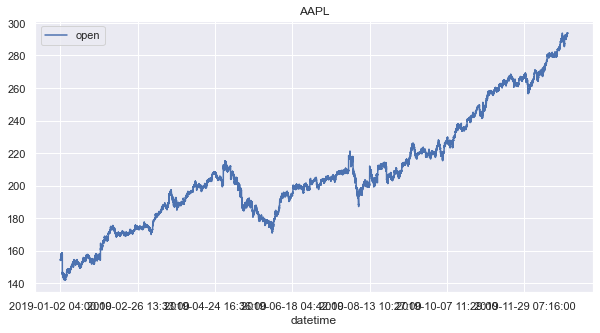

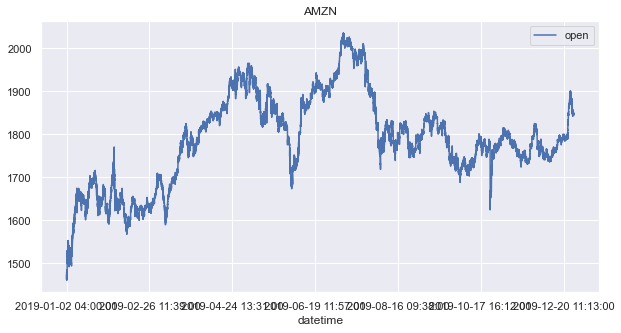

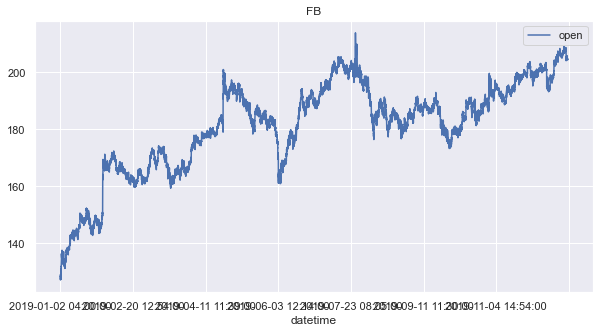

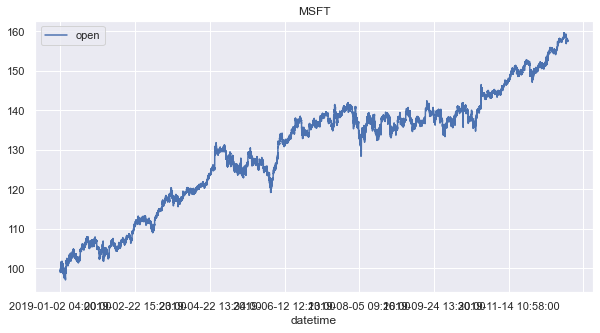

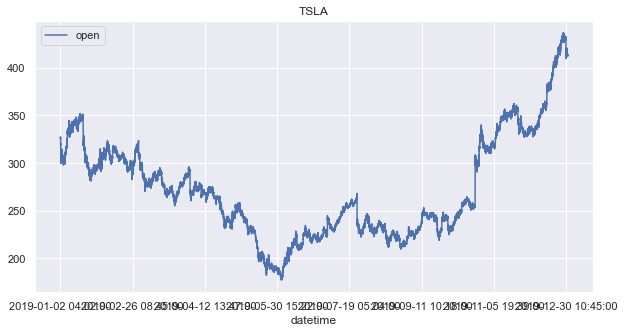

In [38]:
for ticker in tickers:
    stock_df.set_index(["ticker", "datetime"]).loc[ticker].plot(y="open", title=ticker, figsize=(10,5))
plt.show()